### 1. 🖼️ 캔버스 크기 재기 (`xlim`, `ylim`)

```python
xlim = ax.get_xlim() # x축의 가장 왼쪽(최소)과 가장 오른쪽(최대) 값
ylim = ax.get_ylim() # y축의 가장 아래(최소)와 가장 위(최대) 값

```

* **의미:** 우리가 뿌려놓은 데이터들이 존재하는 **'화면의 범위'**를 가져옵니다.
* **비유:** "자, 우리 운동장 어디서부터 어디까지 쓸 거야? 라인 딴 데 가져와."

---

### 2. 📏 눈금 자르기 (`xx`, `yy`)

```python
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

```

* **의미:** `linspace`(Linear Space)는 시작점부터 끝점까지를 **30등분**으로 촘촘하게 자릅니다.
* **비유:** 운동장 가로축에 30개, 세로축에 30개씩 깃발을 꽂을 위치를 표시합니다.

---

### 3. 🏁 바둑판 만들기 (`meshgrid`) - **핵심!**

```python
YY, XX = np.meshgrid(yy, xx)

```

* **의미:** 가로 눈금(`xx`)과 세로 눈금(`yy`)을 엮어서 **'격자(Grid)'**를 만듭니다. 30x30 = 총 **900개의 교차점**이 생깁니다.
* **비유:** 가로줄과 세로줄을 그어서 **모눈종이(바둑판)**를 만드는 과정입니다. 이제 우리는 이 900개의 점 하나하나에 대해 AI에게 물어볼 겁니다. "여기는 누구 땅이야?"

---

### 4. 📍 좌표 리스트로 변환 (`xy`) - **제일 어려운 부분**

```python
xy = np.vstack([XX.ravel(), YY.ravel()]).T

```

* **`ravel()`:** 바둑판 모양(2차원)의 데이터를 한 줄로 **쭉 폅니다(1차원).** (900개짜리 긴 줄이 됨)
* **`vstack()`:** X좌표 줄과 Y좌표 줄을 위아래로 쌓습니다.
* **`.T` (Transpose):** 쌓은 것을 90도 회전시킵니다.
* **결과:** `[[x1, y1], [x2, y2], ... [x900, y900]]` 형태의 **좌표 리스트**가 됩니다.
* **비유:** AI 모델은 바둑판 모양을 이해 못 합니다. 그래서 **"좌표, 좌표"** 형태로 엑셀 정리하듯 줄을 세워서 AI에게 먹여줄 준비를 하는 겁니다.

---

### 5. 🤖 AI의 판정 (`Z`)

```python
Z = model.decision_function(xy).reshape(XX.shape)

```

* **`decision_function(xy)`:** 아까 만든 900개의 좌표를 AI에게 다 넣어봅니다.
* AI의 대답: "여기는 안전지대에서 **-1.5**만큼 빨간팀 땅이야", "여기는 **0**이라 딱 중앙선이야", "여기는 **+2.0**만큼 파란팀 땅이야."


* **`reshape`:** 1줄로 받은 900개의 점수를 다시 **원래 바둑판 모양(30x30)**으로 되돌립니다. (지도를 그려야 하니까요!)

---

### 6. 🎨 등고선 그리기 (`contour`)

```python
ax.contour(XX, YY, Z, levels=[-1, 0, 1], ...)

```

* **의미:** 바둑판 위에서 점수(`Z`)가 같은 곳끼리 선을 잇습니다. 마치 지도의 **등고선**과 같습니다.
* **-1:** 빨간 팀 한계선 (점선)
* **0:** 중앙 경계선 (실선)
* **1:** 파란 팀 한계선 (점선)


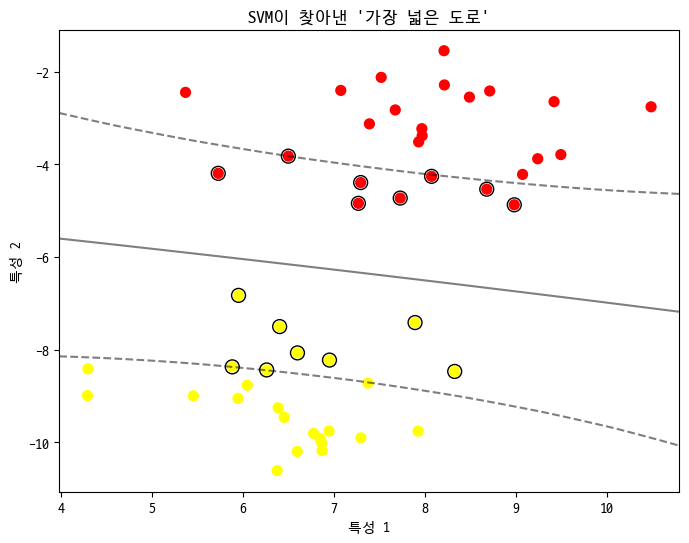

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False

X, y = make_blobs(n_samples=50, centers=2, random_state=6)

model = svm.SVC(kernel='rbf', C=1.0)
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title("SVM이 찾아낸 '가장 넓은 도로'")
plt.xlabel("특성 1")
plt.ylabel("특성 2")
plt.show()

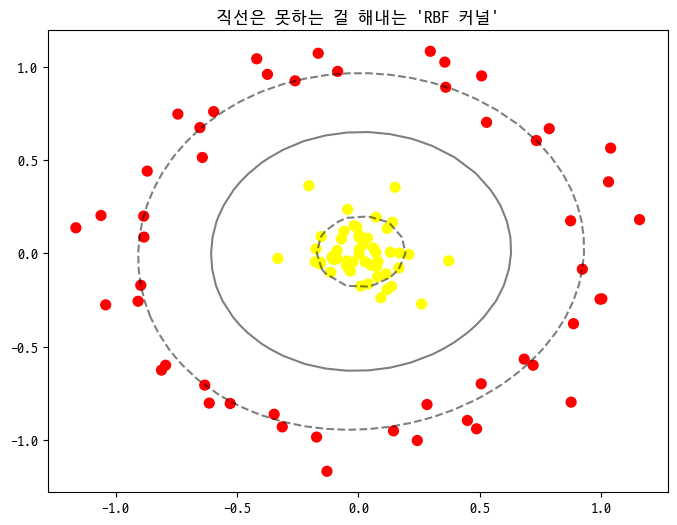

In [5]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, factor=0.1, noise=0.1, random_state=42)

model = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.title("직선은 못하는 걸 해내는 'RBF 커널'")
plt.show()

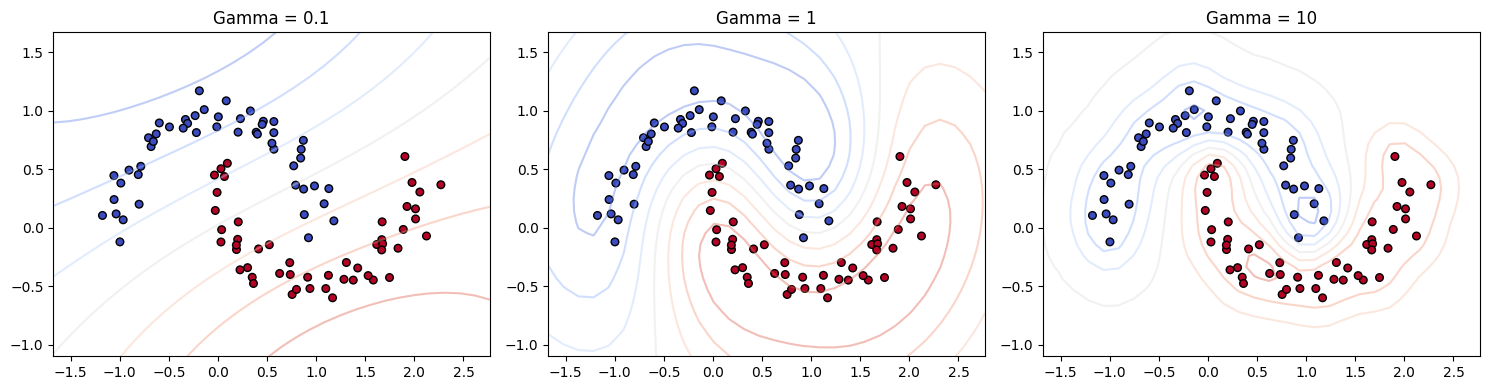

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

gamma_values = [0.1, 1, 10]

plt.figure(figsize=(15, 4))

for i, gamma in enumerate(gamma_values):
    model = svm.SVC(kernel='rbf', gamma=gamma, C=1.0)
    model.fit(X, y)

    plt.subplot(1, 3, i+1)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 30)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm', edgecolors='k')

    plt.title(f"Gamma = {gamma}")

plt.tight_layout()
plt.show()

In [6]:
import numpy as np
x = np.linspace(0, 30, 11)
y = np.linspace(0, 50, 11)
xx, yy = np.meshgrid(x, y)
print(yy)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
 [25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.]
 [30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]
 [35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.]
 [40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.]
 [45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]]
